<a href="https://colab.research.google.com/github/Prashanna-Raj-Pandit/NN-Time-series/blob/main/BitPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activating GPU

In [91]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Load data

In [92]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2025-11-27 02:26:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-11-27 02:26:40 (7.30 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [93]:
import pandas as pd
df=pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",parse_dates=["Date"],index_col=["Date"])
print(df.head())

           Currency  Closing Price (USD)  24h Open (USD)  24h High (USD)  \
Date                                                                       
2013-10-01      BTC            123.65499       124.30466       124.75166   
2013-10-02      BTC            125.45500       123.65499       125.75850   
2013-10-03      BTC            108.58483       125.45500       125.66566   
2013-10-04      BTC            118.67466       108.58483       118.67500   
2013-10-05      BTC            121.33866       118.67466       121.93633   

            24h Low (USD)  
Date                       
2013-10-01      122.56349  
2013-10-02      123.63383  
2013-10-03       83.32833  
2013-10-04      107.05816  
2013-10-05      118.00566  


In [94]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [96]:
len(df)

2787

In [97]:
df=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
df.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'Price')

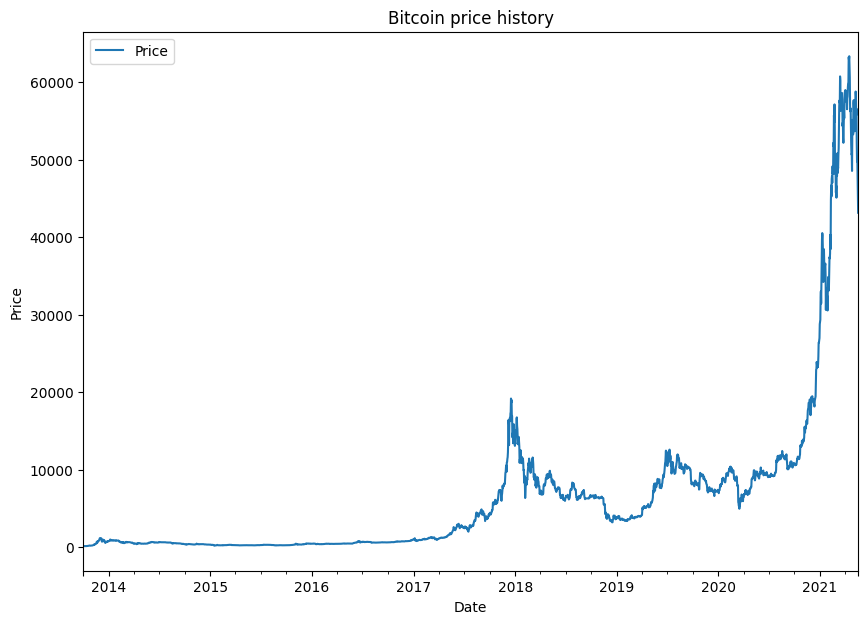

In [98]:
import matplotlib.pyplot as plt
df.plot(figsize=(10,7))
plt.title("Bitcoin price history")
plt.ylabel("Price")

## Train/Test split

In [99]:
# get the bitcoin data array
timesteps=df.index.to_numpy()
prices=df["Price"].to_numpy()

timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [100]:
split_size=int(0.8*len(df))
x_train,y_train=timesteps[:split_size],prices[:split_size]
len(x_train),len(y_train)

(2229, 2229)

In [101]:
x_test,y_test=timesteps[split_size:],prices[split_size:]
len(x_test),len(y_test)

(558, 558)

### Visualizing train and test data of timeseries

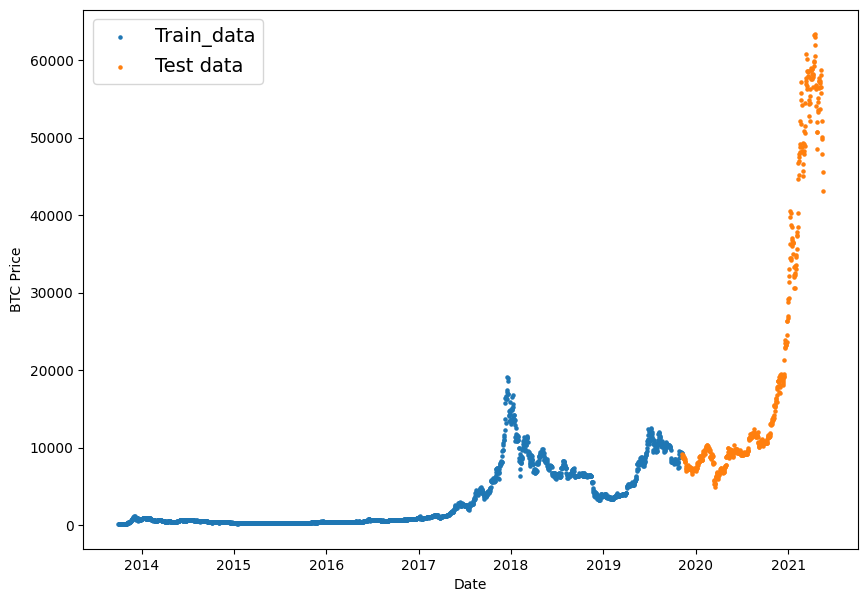

In [102]:
plt.figure(figsize=(10,7))
plt.scatter(x_train,y_train,s=5,label="Train_data")
plt.scatter(x_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [103]:
# A funtion to plot the timeseries data
def plot_time_series(timesteps,values, format=".", start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

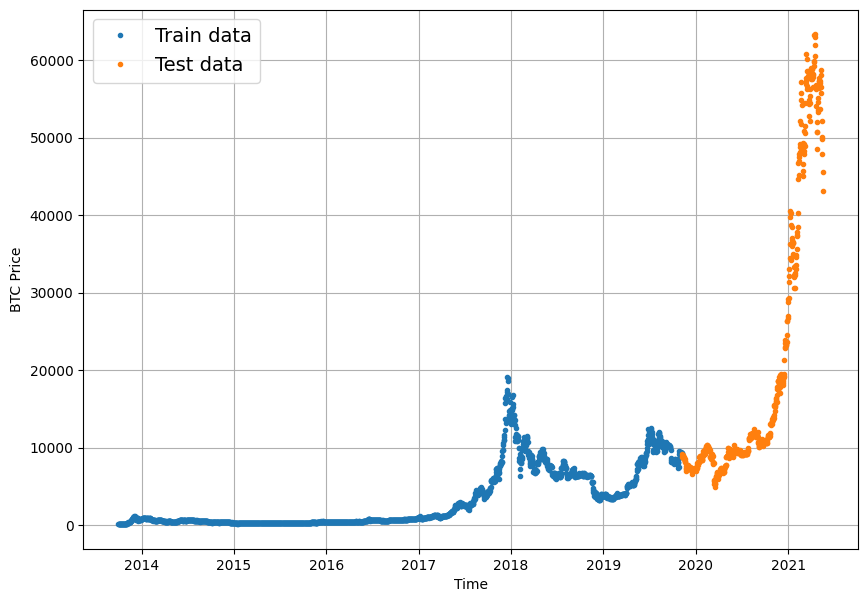

In [104]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train,values=y_train,label="Train data")
plot_time_series(timesteps=x_test,values=y_test,label="Test data")

# Modeling Experiments

Training on univariate data- only one predictor (prices) is involved in the forcasting



## Naive Model

In [105]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [106]:
x_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [107]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [108]:
import tensorflow as tf

def mean_absolute_scaled_error(y_true,y_pred):
  """
  Implementing MASE assuming no seasonality of data.
  """
  mae=tf.reduce_mean(tf.abs(y_true-y_pred))
  # find the MAE of naive forcast (no seasonality)
  mae_naive_no_seasonality=tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_seasonality


In [109]:
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=y_test[:-1]).numpy()


np.float64(0.9995699939182624)

In [110]:

def evaluate_metrics(y_true,y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  mae=tf.keras.metrics.mae(y_true,y_pred)
  mse=tf.keras.metrics.mse(y_true,y_pred)
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mape(y_true,y_pred)
  mase=mean_absolute_scaled_error(y_true,y_pred)

  return {
      "mae":mae.numpy(),
      "mse":mse.numpy(),
      "rmse":rmse.numpy(),
      "mape":mape.numpy(),
      "mase":mase.numpy()
  }

In [133]:
naive_model_results=evaluate_metrics(y_true=y_test[:-1],y_pred=y_test[1:])
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

Tensorflow Expand_dims concept

In [112]:
import tensorflow as tf

# Create a 2D tensor
x = tf.constant([[1, 2, 3], [4, 5, 6]])
print("Original tensor x:\n", x)
print("Shape of x:", x.shape)

# Expand dimensions at axis 0 (add a new outer dimension)
res_axis_0 = tf.expand_dims(x, 0)
print("\nTensor after expanding dims at axis 0:\n", res_axis_0)
print("Shape of res_axis_0:", res_axis_0.shape) # Shape changes from (2, 3) to (1, 2, 3)

# Expand dimensions at axis 1 (add a new dimension in the middle)
res_axis_1 = tf.expand_dims(x, 1)
print("\nTensor after expanding dims at axis 1:\n", res_axis_1)
print("Shape of res_axis_1:", res_axis_1.shape) # Shape changes from (2, 3) to (2, 1, 3)

# Expand dimensions at axis -1 (add a new inner dimension)
res_axis_neg1 = tf.expand_dims(x, -1)
print("\nTensor after expanding dims at axis -1:\n", res_axis_neg1)
print("Shape of res_axis_neg1:", res_axis_neg1.shape) # Shape changes from (2, 3) to (2, 3, 1)

Original tensor x:
 tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
Shape of x: (2, 3)

Tensor after expanding dims at axis 0:
 tf.Tensor(
[[[1 2 3]
  [4 5 6]]], shape=(1, 2, 3), dtype=int32)
Shape of res_axis_0: (1, 2, 3)

Tensor after expanding dims at axis 1:
 tf.Tensor(
[[[1 2 3]]

 [[4 5 6]]], shape=(2, 1, 3), dtype=int32)
Shape of res_axis_1: (2, 1, 3)

Tensor after expanding dims at axis -1:
 tf.Tensor(
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]], shape=(2, 3, 1), dtype=int32)
Shape of res_axis_neg1: (2, 3, 1)


In [113]:
# lets setup the global variables for the window and horizon
HORIZON=1 # predict next 1 day
WINDOW=7 # use the past one week of bitcoin data


In [114]:
# create function to label windowed data
def get_labeled_window(x,horizon=HORIZON):
  """
  creates labels for the windowed dataset
  eg, if horizon=1
  input:[0,1,2,3,4,5,6,7]-> output: ([0,1,2,3,4,5,6],[7])
  """
  return x[:,:-horizon],x[:,-horizon:]

In [115]:
# test out the window labeling function
test_window, test_label=get_labeled_window(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [116]:
# create function to view NumPy arrays as windows
import numpy as np
def make_windows(x,window_size=WINDOW,horizon=HORIZON):
  """
  Turns a 1D array in to 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # create a window of specific window size (add the horizon on the end for labelling latter)
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  # print("window",window_step)
  # create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T # create 2D array of window of size window size
  # print(f"window indexed: \n{window_indexes, window_indexes.shape}")
  window_array=x[window_indexes]
  print("Window array",window_array)
  window,label=get_labeled_window(window_array,horizon=horizon)
  return window,label

In [117]:
np.expand_dims(np.arange(8),axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [118]:
make_windows(prices,window_size=WINDOW,horizon=HORIZON)

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


(array([[  123.65499   ,   125.455     ,   108.58483   , ...,
           121.33866   ,   120.65533   ,   121.795     ],
        [  125.455     ,   108.58483   ,   118.67466   , ...,
           120.65533   ,   121.795     ,   123.033     ],
        [  108.58483   ,   118.67466   ,   121.33866   , ...,
           121.795     ,   123.033     ,   124.049     ],
        ...,
        [58788.20967893, 58102.19142623, 55715.54665129, ...,
         52147.82118698, 49764.1320816 , 50032.69313676],
        [58102.19142623, 55715.54665129, 56573.5554719 , ...,
         49764.1320816 , 50032.69313676, 47885.62525472],
        [55715.54665129, 56573.5554719 , 52147.82118698, ...,
         50032.69313676, 47885.62525472, 45604.61575361]]),
 array([[  123.033     ],
        [  124.049     ],
        [  125.96116   ],
        ...,
        [47885.62525472],
        [45604.61575361],
        [43144.47129086]]))

In [119]:
len(prices)

2787

In [120]:
# we can also use axis=1 like this.
#starts = np.expand_dims(np.arange(len(x)-(WINDOW+HORIZON-1)), axis=1)

np.expand_dims(np.arange(len(prices)-(WINDOW+HORIZON-1)),axis=0).T

array([[   0],
       [   1],
       [   2],
       ...,
       [2777],
       [2778],
       [2779]])

In [121]:
full_window,full_label=make_windows(prices)
full_window.shape,full_label.shape

Window array [[  123.65499      125.455        108.58483    ...   120.65533
    121.795        123.033     ]
 [  125.455        108.58483      118.67466    ...   121.795
    123.033        124.049     ]
 [  108.58483      118.67466      121.33866    ...   123.033
    124.049        125.96116   ]
 ...
 [58788.20967893 58102.19142623 55715.54665129 ... 49764.1320816
  50032.69313676 47885.62525472]
 [58102.19142623 55715.54665129 56573.5554719  ... 50032.69313676
  47885.62525472 45604.61575361]
 [55715.54665129 56573.5554719  52147.82118698 ... 47885.62525472
  45604.61575361 43144.47129086]]


((2780, 7), (2780, 1))

In [122]:
# lets visualize 5 window and labels
for i in range(5):
  print(f"window: {full_window[i]} -> label: {full_label[i]}\n")

window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> label: [123.033]

window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> label: [124.049]

window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> label: [125.96116]

window: [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116] -> label: [125.27966]

window: [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966] -> label: [125.9275]



In [123]:
def make_train_test_split(window,labels,test_split=0.2):
  """
  split matching pairs of windows and labels into train and test splits.
  """
  split_size=int(len(window)*(1-test_split))
  train_windows=window[:split_size]
  train_labels=labels[:split_size]
  test_windows=window[split_size:]
  test_labels=labels[split_size:]

  return train_windows, test_windows,train_labels,test_labels

In [124]:
train_windows,test_window, train_labels,test_labels=make_train_test_split(full_window,full_label)
len(train_windows),len(test_window),len(train_labels),len(test_labels)


(2224, 556, 2224, 556)

In [125]:
test_window[:5],test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

In [126]:
import os
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window=7, horizon=1)

In [127]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9225.99547934, 9131.41063031, 9197.63234462, ..., 9202.41545055,
        9369.62808116, 9326.59962378],
       [9131.41063031, 9197.63234462, 9290.89660239, ..., 9369.62808116,
        9326.59962378, 9335.75240233],
       [9197.63234462, 9290.89660239, 9202.41545055, ..., 9326.59962378,
        9335.75240233, 9226.48582088]])

In [128]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1=tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON,activation="linear")# linear activation means no activation
], name="model_1_dense")

model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window,test_labels))

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1854.1978 - mae: 1854.1978 - mse: 9941825.0000 - val_loss: 3049.5129 - val_mae: 3049.5129 - val_mse: 20916178.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 362.9694 - mae: 362.9694 - mse: 451798.8750 - val_loss: 1067.5975 - val_mae: 1067.5975 - val_mse: 3787747.7500
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 203.0679 - mae: 203.0679 - mse: 193157.1406 - val_loss: 1021.4359 - val_mae: 1021.4359 - val_mse: 3441839.2500
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 181.7772 - mae: 181.7772 - mse: 164230.8125 - val_loss: 994.2475 - val_mae: 994.2475 - val_mse: 3238509.0000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 171.2631 - mae: 171.2631 - mse: 153328.2812 - val_loss: 989.1557 - val_mae: 989.1557 - val_mse: 3094799.2500
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 166.3704 - mae: 166.3704 - mse: 144129.0312 - val_loss: 940.2234 - val_mae: 940.2234 - val

In [129]:
model_1.evaluate(test_window,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 292.2716 - mae: 292.2716 - mse: 351485.9062


[580.7330322265625, 580.7330322265625, 1196521.75]

In [130]:
# Making forecast with model (on the test dataset)

def make_preds(model,input_data):
  # make prediction on the given model and the input dataset
  forecast=model.predict(input_data)
  return tf.squeeze(forecast)

In [131]:
# model evaluation

model_1_preds=make_preds(model=model_1,input_data=test_window)
len(model_1_preds)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


556

In [132]:
model_1_results=evaluate_metrics(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results

{'mae': np.float32(580.7331),
 'mse': np.float32(1196521.9),
 'rmse': np.float32(1093.8564),
 'mape': np.float32(2.6165676),
 'mase': np.float32(1.0201871)}

In [134]:
naive_model_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.527042),
 'mase': np.float32(1.0060278)}

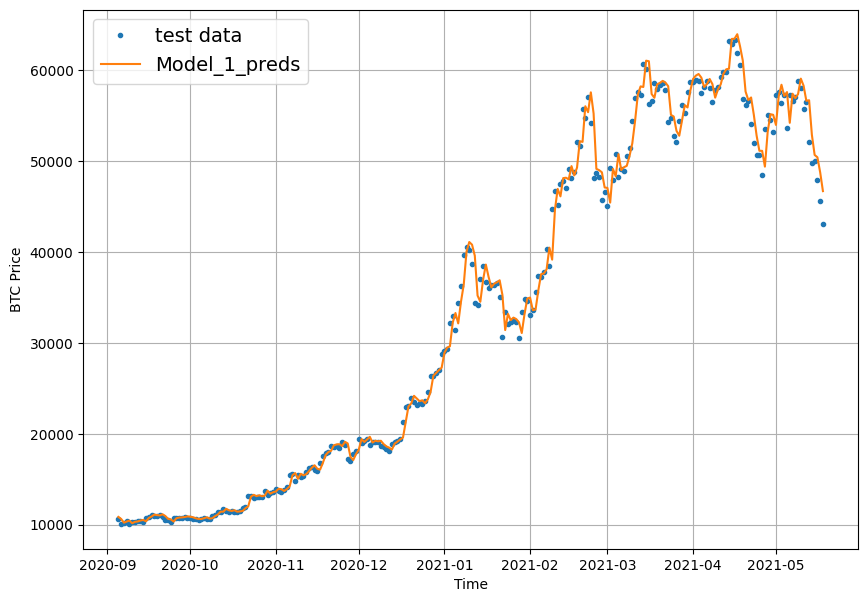

In [138]:
offset=300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_test[-len(test_window):],values=test_labels[:,0],start=offset,label="test data")
plot_time_series(timesteps=x_test[-len(test_window):],values=model_1_preds,start=offset,label="Model_1_preds",format="-")
